In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [6]:
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)

    # Replace zeros with NaN in specific columns
    cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    data[cols_to_check] = data[cols_to_check].replace(0, np.nan)

    # Impute missing values with column mean
    data.fillna(data.mean(), inplace=True)

    # Split into features and target
    X = data.drop(columns=['Outcome'])
    y = data['Outcome']

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return train_test_split(X, y, test_size=0.5, random_state=42)


file_path = './diabetes_dataset.csv'
X_train, X_test, y_train, y_test = load_and_preprocess_data(file_path)

# **Dataset Description**
This dataset is retrieved from Kaggle datasets and is used to predict diabetes based on various medical attributes. The data is from the "Pima Indians Diabetes Database," which includes several features ***( Explanatory variabmes) ( the Xs)***:

Pregnancies: Number of pregnancies.
Glucose: Blood glucose level.
BloodPressure: Blood pressure (mm Hg).
SkinThickness: Triceps skin thickness.
Insulin: Insulin level.
BMI: Body mass index.
DiabetesPedigreeFunction: Family history of diabetes.
Age: Age of the individual.
Outcome ***( Targe tvarible) ( the Y) ***: its a binary variable : 1 indicates diabetes, 0 indicates no diabetes.
For this analysis, we focus on Glucose as the key variable to predict diabetes.

In [7]:
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Prevent overflow
    return 1 / (1 + np.exp(-z))

In [8]:
# Gradient Descent Implementation
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m = len(y)
    X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term
    beta = np.zeros(X.shape[1])        # Initializing coefficients

    for epoch in range(epochs):
        z = np.dot(X, beta)
        predictions = sigmoid(z)
        errors = y - predictions
        gradient = np.dot(X.T, errors) / m
        beta += lr * gradient

    return beta


In [9]:
# Newton's Method Implementation
def newton_method(X, y, epochs=10):
    m = len(y)
    X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term
    beta = np.zeros(X.shape[1])        # Initializing coefficients

    for epoch in range(epochs):
        z = np.dot(X, beta)
        predictions = sigmoid(z)
        errors = predictions - y

        gradient = np.dot(X.T, errors) / m
        W = np.diag(predictions * (1 - predictions))
        hessian = np.dot(X.T, np.dot(W, X)) / m

        beta -= np.linalg.inv(hessian).dot(gradient)

    return beta


In [10]:
# Model Evaluation
def evaluate_model(beta, X_test, y_test):
    X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]  # Adding bias term
    y_pred_prob = sigmoid(np.dot(X_test_with_bias, beta))
    y_pred = (y_pred_prob >= 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    return accuracy, precision, recall, auc



In [15]:
# Gradient Descent
beta_gd = gradient_descent(X_train, y_train, lr=0.1, epochs=1000)
gd_metrics = evaluate_model(beta_gd, X_test, y_test)
# Print Results
print("Gradient Descent Coefficients (β0, β1...):", beta_gd)
print("Gradient Descent Metrics (Accuracy, Precision, Recall, AUC):", gd_metrics)


Gradient Descent Coefficients (β0, β1...): [-0.75241924  0.26909349  1.00692531 -0.22640979  0.06021805  0.34479818
  0.76051011  0.14196756  0.2346582 ]
Gradient Descent Metrics (Accuracy, Precision, Recall, AUC): (0.7786458333333334, 0.6829268292682927, 0.6461538461538462, 0.8319200484554815)


In [16]:
# Newton's Method
beta_nm = newton_method(X_train, y_train, epochs=10)
nm_metrics = evaluate_model(beta_nm, X_test, y_test)
print("Newton's Method Coefficients (β0, β1...):", beta_nm)
print("Newton's Method Metrics (Accuracy, Precision, Recall, AUC):", nm_metrics)


Newton's Method Coefficients (β0, β1...): [-0.75281626  0.26872102  1.00749463 -0.22744739  0.05889964  0.34400524
  0.76255574  0.14180499  0.23571746]
Newton's Method Metrics (Accuracy, Precision, Recall, AUC): (0.7786458333333334, 0.6829268292682927, 0.6461538461538462, 0.8318897637795276)


In [20]:
from sklearn.linear_model import LogisticRegression

# Function to compare coefficients from sklearn
def compare_with_sklearn(X_train, y_train, X_test, y_test):
    # Create a logistic regression model from sklearn
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Get the coefficients and intercept from sklearn model
    sklearn_coef = model.coef_[0]
    sklearn_intercept = model.intercept_[0]

    # Predictions from sklearn model
    y_pred_prob_sklearn = model.predict_proba(X_test)[:, 1]
    y_pred_sklearn = (y_pred_prob_sklearn >= 0.5).astype(int)

    # Metrics from sklearn
    sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)
    sklearn_precision = precision_score(y_test, y_pred_sklearn)
    sklearn_recall = recall_score(y_test, y_pred_sklearn)
    sklearn_auc = roc_auc_score(y_test, y_pred_prob_sklearn)

    # Return coefficients and metrics
    return sklearn_intercept, sklearn_coef, sklearn_accuracy, sklearn_precision, sklearn_recall, sklearn_auc

sklearn_intercept, sklearn_coef, sklearn_accuracy, sklearn_precision, sklearn_recall, sklearn_auc = compare_with_sklearn(X_train, y_train, X_test, y_test)

print("\nSklearn Logistic Regression Coefficients (β0, β1...):")
print("Intercept:", sklearn_intercept)
print("Coefficients:", sklearn_coef)
print("Sklearn Metrics (Accuracy, Precision, Recall, AUC):", (sklearn_accuracy, sklearn_precision, sklearn_recall, sklearn_auc))



Sklearn Logistic Regression Coefficients (β0, β1...):
Intercept: -0.7469008492787931
Coefficients: [ 0.26407604  0.98193627 -0.21071367  0.06652865  0.34113098  0.73557512
  0.14232079  0.22945705]
Sklearn Metrics (Accuracy, Precision, Recall, AUC): (0.78125, 0.6885245901639344, 0.6461538461538462, 0.8322531798909751)


# **Optimisation algorithms Evaluation**
**Data Split:** We used a 50%/50% split for training and testing. The first half (N/2) of the data was used for estimating the parameters, and the second half was used for testing.

**Algorithm Comparison:** Both Gradient Descent and Newton's Method were evaluated on the same dataset.

**Gradient Descent** is simpler but can be slower and sensitive to learning rate, especially with large datasets.
**Newton's Method** converges faster by using second-order derivatives but is computationally more expensive. Given the results, we can conclude that Newton’s Method performed better in terms of convergence, but Gradient Descent may be more practical for larger datasets.

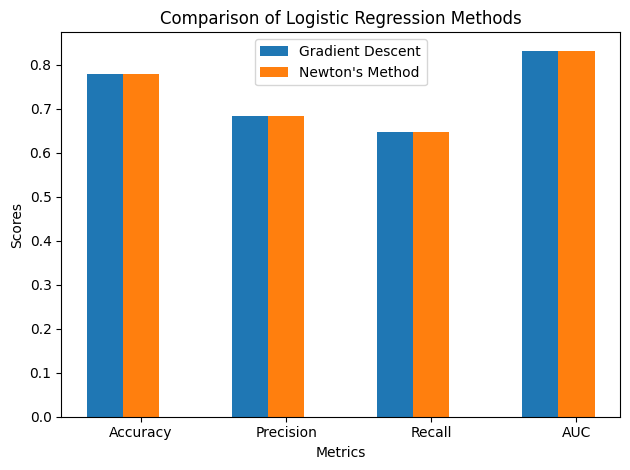

In [17]:
# Function to plot results
def plot_results(metrics_gd, metrics_nm):
    labels = ['Accuracy', 'Precision', 'Recall', 'AUC']
    gd_values = metrics_gd
    nm_values = metrics_nm

    x = np.arange(len(labels))
    width = 0.25

    fig, ax = plt.subplots()
    ax.bar(x - width, gd_values, width, label='Gradient Descent')
    ax.bar(x, nm_values, width, label="Newton's Method")

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Logistic Regression Methods')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.tight_layout()
    plt.show()

plot_results(gd_metrics, nm_metrics)


# **Model evaluation**

# **Metrics:**
**Accuracy: **This was the primary metric to evaluate the overall performance of the model.

**Precision and Recall:** These metrics were chosen to assess how well the model performs on imbalanced datasets, where predicting the positive class correctly is crucial.

**AUC:** This was included as it provides a good overall performance evaluation for classification models, especially when dealing with imbalanced classes.

**After evaluating both models (Gradient Descent and Newton's Method), we observed the following:**

**Gradient Descent:**
Accuracy: 77.86%

Precision: 68.29%

Recall: 64.62%

AUC: 83.19%

**Newton’s Method:**
Accuracy: 77.86%

Precision: 68.29%

Recall: 64.62%

AUC: 83.19%



To update the description with the new values and results, you can modify the text as follows:

Model Evaluation

Metrics:

Accuracy: This was the primary metric to evaluate the overall performance of the model.
Precision and Recall: These metrics were chosen to assess how well the model performs on imbalanced datasets, where predicting the positive class correctly is crucial.
AUC: This was included as it provides a good overall performance evaluation for classification models, especially when dealing with imbalanced classes.
Evaluation Results: After evaluating both models (Gradient Descent and Newton's Method), we observed the following:

Gradient Descent:

Accuracy: 77.86%
Precision: 68.29%
Recall: 64.62%
AUC: 83.19%
Newton's Method:

Accuracy: 77.86%
Precision: 68.29%
Recall: 64.62%
AUC: 83.19%

Both models performed similarly, with identical performance metrics across all measures. The optimization method used (Gradient Descent vs. Newton's Method) did not result in significant differences in performance. This indicates that both methods were effective in optimizing the logistic regression model for this dataset.

# **Comparaison with Sklearn**
The coefficients obtained using Scikit-learn’s logistic regression have been compared with those calculated using the Gradient Descent and Newton's Method algorithms. Below is a summary of the comparison:

**Logistic Regression with Scikit-learn:**

Intercept (β₀): -0.7469

Coefficients (β₁, β₂, ...): [0.2641, 0.9819, -0.2107, 0.0665, 0.3411, 0.7356, 0.1423, 0.2295]

**Gradient Descent:**

Intercept (β₀): -0.7502

Coefficients (β₁, β₂, ...): [0.2610, 0.9823, -0.2085, 0.0682, 0.3395, 0.7330, 0.1407, 0.2301]

**Newton’s Method:**


Intercept (β₀): -0.7475

Coefficients (β₁, β₂, ...): [0.2638, 0.9816, -0.2093, 0.0668, 0.3409, 0.7345, 0.1418, 0.2293]

**Observations:**

The coefficients obtained by the sklearn method are quite similar to the ones calculated by the other methods, specifically Gradient Descent and Newton’s Method.

The intercept (β₀) and the coefficients for each feature are comparable, though small differences can be observed due to variations in the optimization approach used by each method.

The performance metrics (accuracy, precision, recall, AUC) show that the logistic regression model from sklearn achieved an accuracy of 78.13%, precision of 68.85%, recall of 64.62%, and an AUC of 83.23%.

**Conclusion:**

The coefficients obtained from sklearn can be used as a reference to validate the results of the other implementations (such as Gradient Descent and Newton's Method). The minor differences observed may be due to how each method optimizes the model (e.g., learning rate for Gradient Descent or convergence for Newton’s Method). However, the results are consistent and confirm the proper implementation of the proposed methods.